# Import Library

In [ ]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up notebook display
pd.set_option('display.max_columns', None)

# Load Data

In [ ]:
# data train
!gdown 1e4ltzhHqgBrogvEAl6wLeoMWwRdNN-1U

# data target
!gdown 130Ph6txbt7P64fTcrOL0xpMXrA-VV6KH

# data test
!gdown 14PCrmr4P0Gi6uYl3-26ap5xAKNSSgLkr

Downloading...
From: https://drive.google.com/uc?id=1e4ltzhHqgBrogvEAl6wLeoMWwRdNN-1U
To: /content/train.csv
100% 738k/738k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=130Ph6txbt7P64fTcrOL0xpMXrA-VV6KH
To: /content/target.csv
100% 41.3k/41.3k [00:00<00:00, 42.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=14PCrmr4P0Gi6uYl3-26ap5xAKNSSgLkr
To: /content/test.csv
100% 332k/332k [00:00<00:00, 97.7MB/s]


In [ ]:
train_df = pd.read_csv('train.csv')
target_df = pd.read_csv('target.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low


In [ ]:
test_df.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


**Kolom ID untuk Submission**

In [ ]:
test_ids = test_df["ID"]

In [ ]:
# Test yang drop kolom ID
test_df = test_df.drop(columns=["ID"])

In [ ]:
target_df.head()

,coppaRisk
0,False
1,False
2,False
3,False
4,False


# 1. EDA (Exploratory Data Analysis)

**Gabungkan Train dan Target**

In [ ]:
# Gabungkan train features dengan target
train_df['coppaRisk'] = target_df['coppaRisk']

## Jumlah Baris & Kolom

In [ ]:
print(f"Shape of train_df set: {train_df.shape}")
print(f"Shape of test_df set: {test_df.shape}")

Shape of train_df set: (7000, 17)
Shape of test_df set: (3000, 16)


## Distribusi Target (Imbalance)

Class Balance:
coppaRisk
False    0.900571
True     0.099429
Name: proportion, dtype: float64


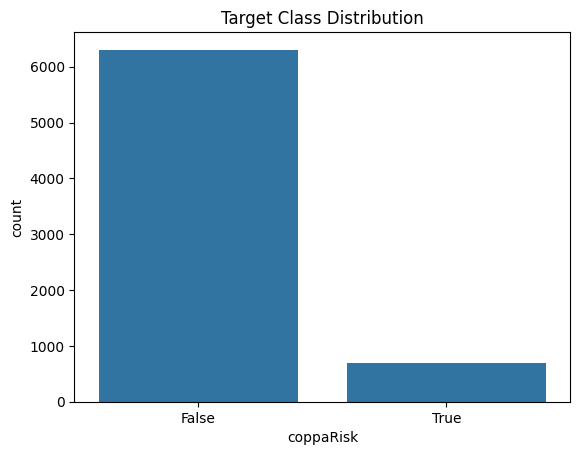

In [ ]:
# Class distribution
print("Class Balance:")
print(train_df["coppaRisk"].value_counts(normalize=True))

# Visualize it
sns.countplot(x="coppaRisk", data=train_df)
plt.title("Target Class Distribution")
plt.show()

## Missing Values (Train & Test)

In [ ]:
# Mengecek missing value yang > 0% pada train dan test

# Hitung jumlah missing
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Hitung proporsi missing dalam persen
missing_train_percent = 100 * missing_train / len(train_df)
missing_test_percent = 100 * missing_test / len(test_df)

# Filter yang lebih dari 0%
missing_train_filtered = missing_train_percent[missing_train_percent > 0].sort_values(ascending=False)
missing_test_filtered = missing_test_percent[missing_test_percent > 0].sort_values(ascending=False)

# Gabungkan jadi satu tabel untuk perbandingan
missing_summary = pd.concat([missing_train_filtered, missing_test_filtered], axis=1, keys=['% Missing Train', '% Missing Test'])
missing_summary

,% Missing Train,% Missing Test
appContentBrandSafetyRating,88.028571,89.033333
adSpent,81.128571,80.866667
hasTermsOfServiceLink,66.214286,65.366667
hasTermsOfServiceLinkRating,66.214286,65.366667
downloads,30.700000,29.366667
averageUserRating,17.600000,17.133333
isCorporateEmailScore,16.114286,14.666667
hasPrivacyLink,10.714286,10.533333
countryCode,0.914286,0.966667
appAge,0.714286,0.566667


## Tipe Data

In [ ]:
# Show dtypes
print("Feature Data Types:")
print(train_df.dtypes)

# Quick preview of datasets
print("\nTrain Data Sample:")
display(train_df.head())

print("\nTest Data Sample:")
display(test_df.head())

Feature Data Types:
developerCountry                    object
countryCode                         object
userRatingCount                      int64
primaryGenreName                    object
downloads                           object
deviceType                          object
hasPrivacyLink                      object
hasTermsOfServiceLink               object
hasTermsOfServiceLinkRating         object
isCorporateEmailScore              float64
adSpent                            float64
appAge                             float64
averageUserRating                  float64
appContentBrandSafetyRating         object
appDescriptionBrandSafetyRating     object
mfaRating                           object
coppaRisk                             bool
dtype: object

Train Data Sample:


,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False



Test Data Sample:


,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


## EDA Fitur Numerik

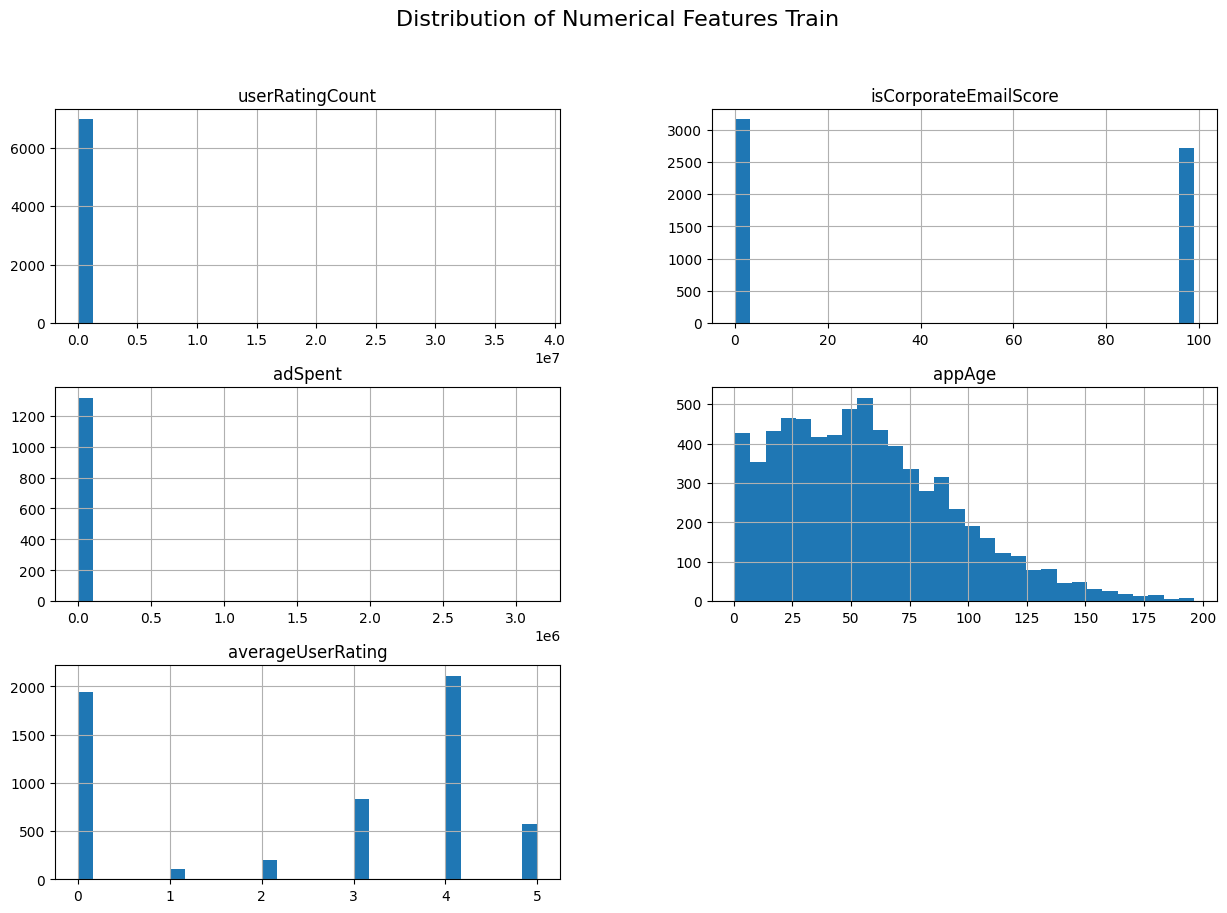

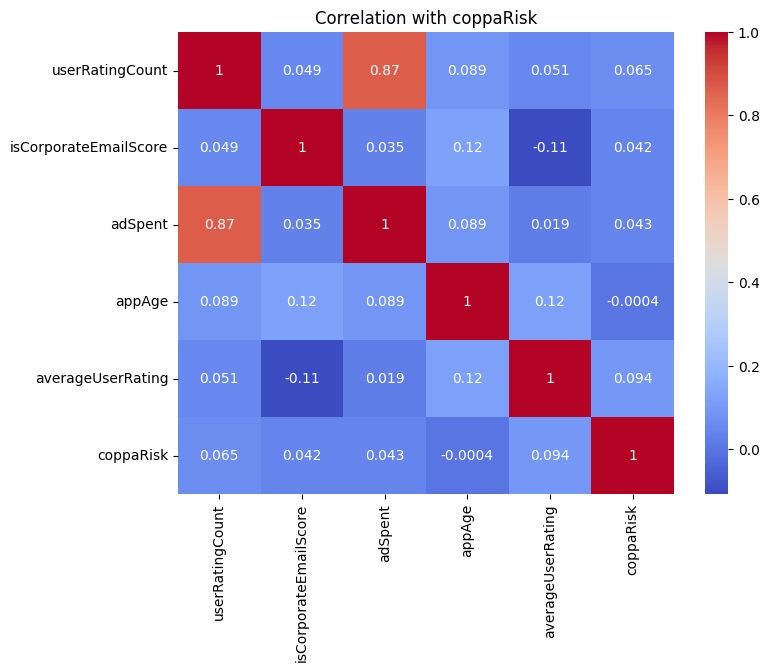

In [ ]:
numerical_cols = ['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge', 'averageUserRating']

# Histograms for numeric features
train_df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features Train", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[numerical_cols + ['coppaRisk']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with coppaRisk")
plt.show()

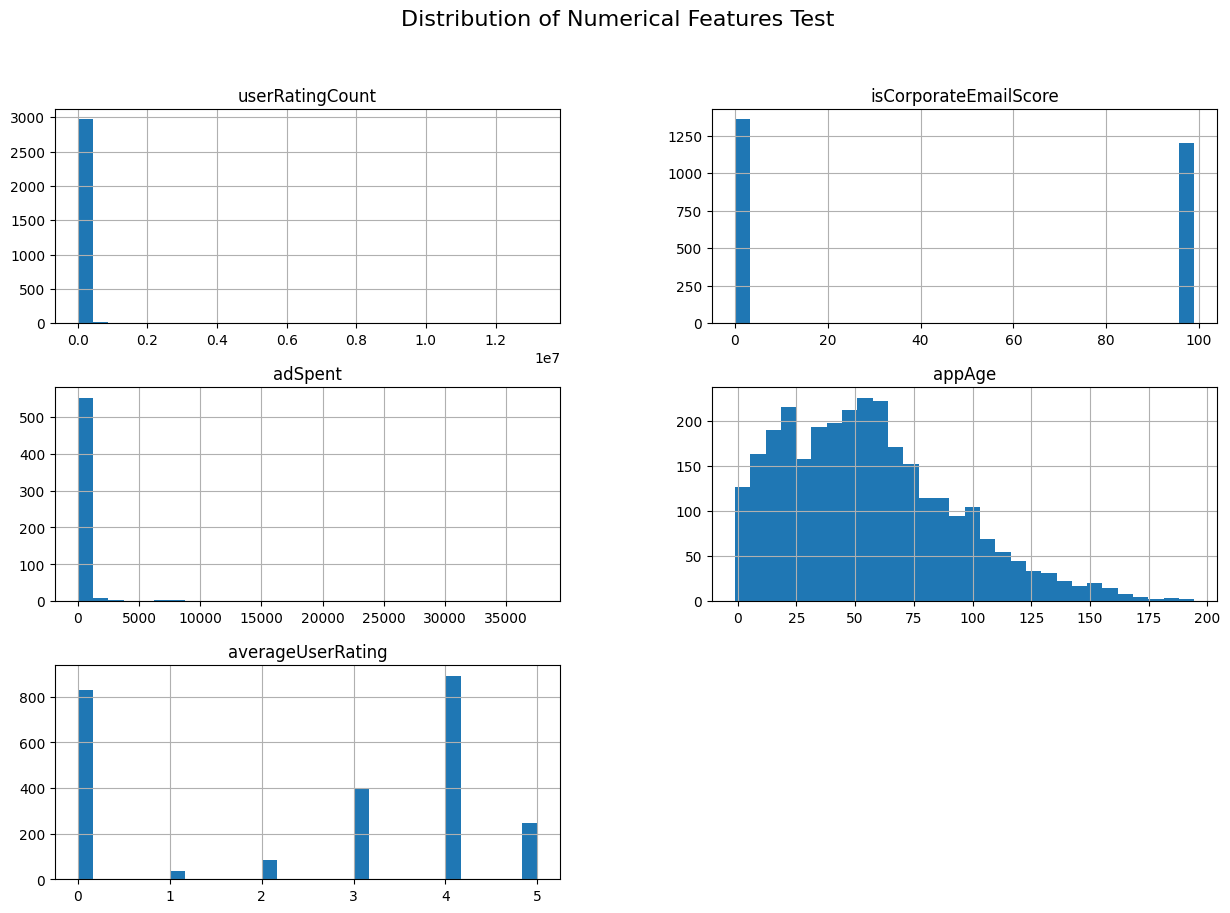

In [ ]:
numerical_cols = ['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge', 'averageUserRating']

# Histograms for numeric features
test_df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features Test", fontsize=16)
plt.show()

Perhatikan, jika dilihat userRatingCount & adSpent distribusinya sangat right-skewed sehingga perlu pertimbangan untuk log transform.

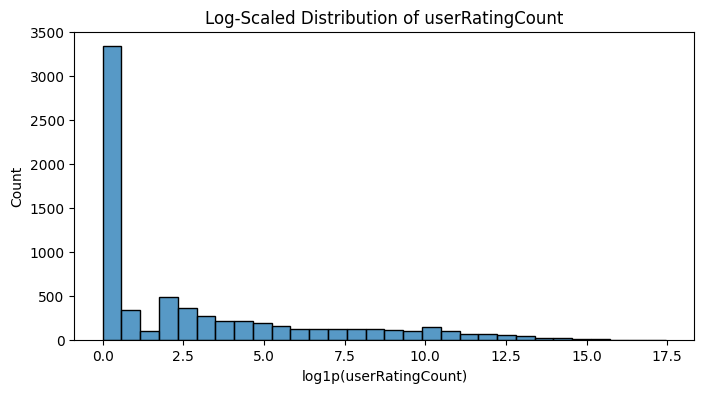

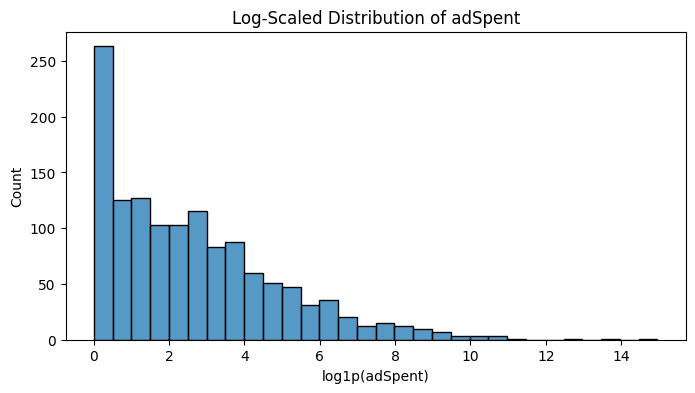

UserRatingCount correlation with coppaRisk (log-scaled): 0.19194720403163035
adSpent Correlation with coppaRisk (log-scaled): 0.05837815591842163


In [ ]:
# Simpan Data Asli
df_train = train_df.copy()
df_test = test_df.copy()

# Log-transform skewed features
train_df["userRatingCount_log"] = np.log1p(train_df["userRatingCount"])
test_df["userRatingCount_log"] = np.log1p(test_df["userRatingCount"])

train_df["adSpent_log"] = np.log1p(train_df["adSpent"])
test_df["adSpent_log"] = np.log1p(test_df["adSpent"])

# Plot it again
plt.figure(figsize=(8, 4))
sns.histplot(train_df["userRatingCount_log"], bins=30)
plt.title("Log-Scaled Distribution of userRatingCount")
plt.xlabel("log1p(userRatingCount)")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(train_df["adSpent_log"], bins=30)
plt.title("Log-Scaled Distribution of adSpent")
plt.xlabel("log1p(adSpent)")
plt.show()

# Correlation with coppaRisk again
corr_userRatingCountLog = train_df[["userRatingCount_log", "coppaRisk"]].corr().iloc[0, 1]
print("UserRatingCount correlation with coppaRisk (log-scaled):", corr_userRatingCountLog)

corr_adSpentLog = train_df[["adSpent_log", "coppaRisk"]].corr().iloc[0, 1]
print("adSpent Correlation with coppaRisk (log-scaled):", corr_adSpentLog)

## EDA Fitur Kategorik


--- developerCountry ---
developerCountry
ADDRESS NOT LISTED IN PLAYSTORE    4338
CANNOT IDENTIFY COUNTRY             769
UNITED STATES                       324
CHINA                               150
INDIA                               131
                                   ... 
KYRGYZSTAN                            1
BELARUS                               1
LEBANON                               1
MALDIVES                              1
STATUTORY MASKING ENABLED             1
Name: count, Length: 114, dtype: int64

--- countryCode ---
countryCode
GLOBAL    5802
US          74
EMEA        73
NaN         64
APAC        64
          ... 
MA           1
CM           1
RE           1
LK           1
IR           1
Name: count, Length: 120, dtype: int64

--- primaryGenreName ---
primaryGenreName
Games                      1828
Education                   500
Entertainment               431
Business                    423
Lifestyle                   340
Tools                       308
Music 

<ipython-input-98-916561162569>:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


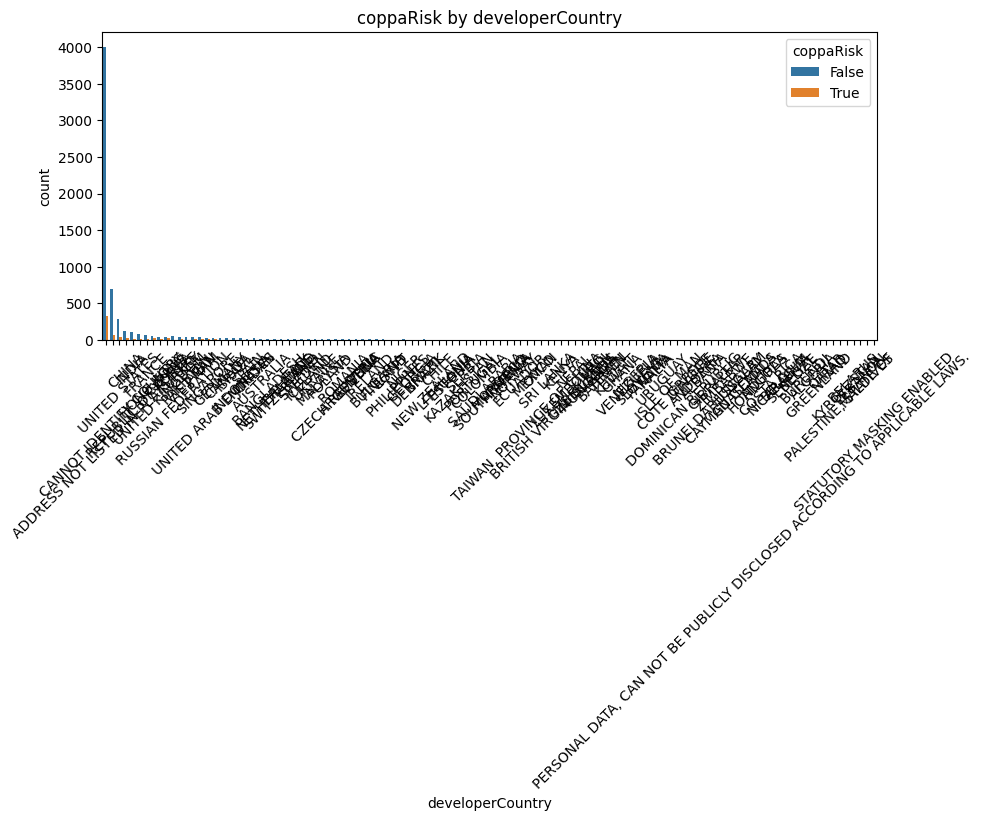

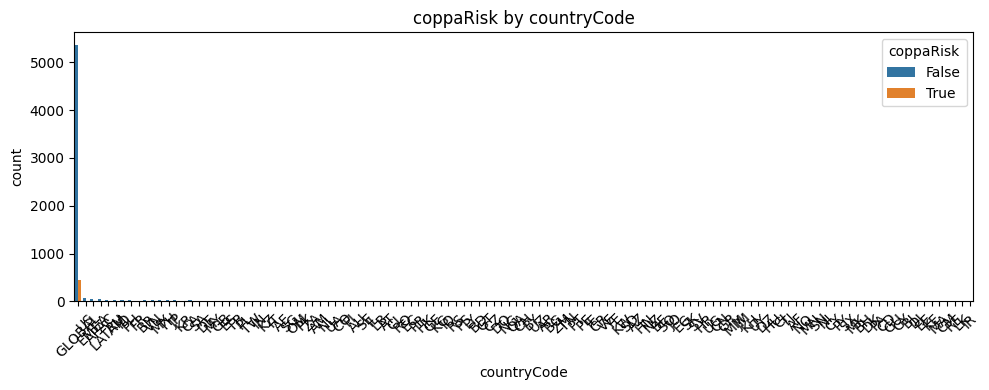

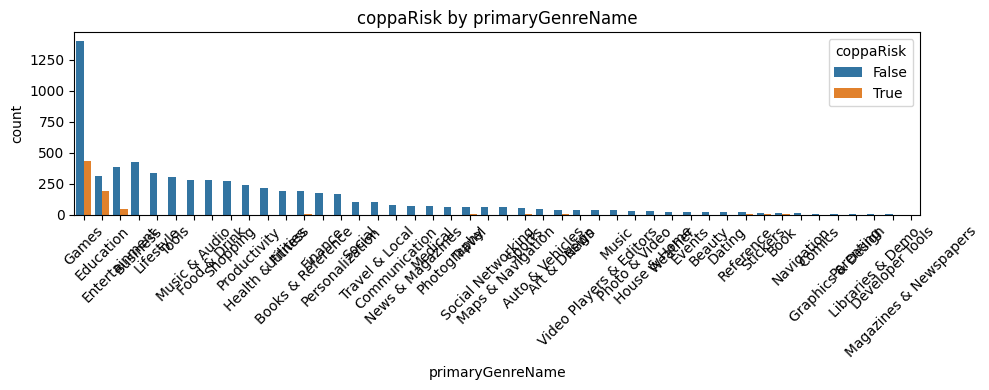

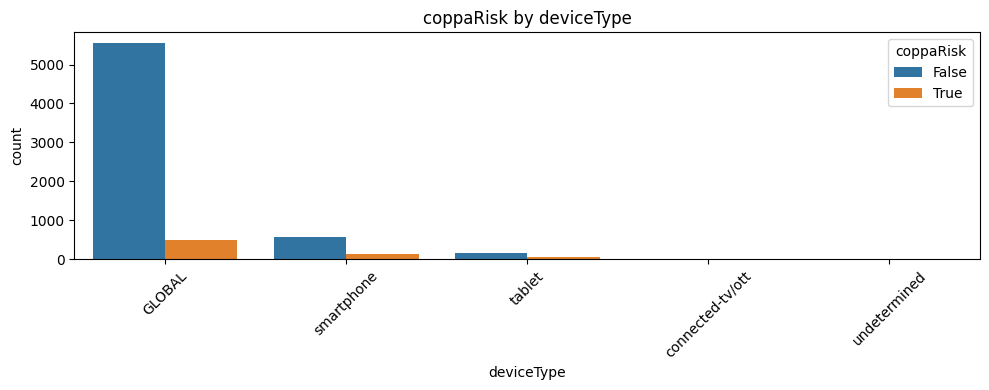

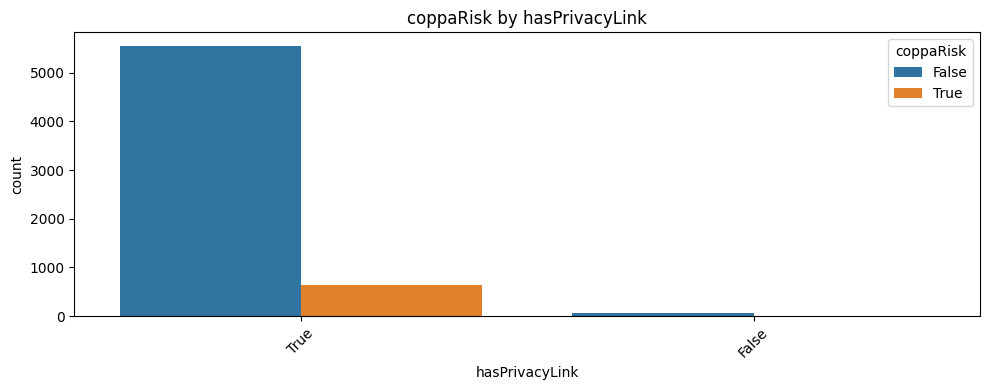

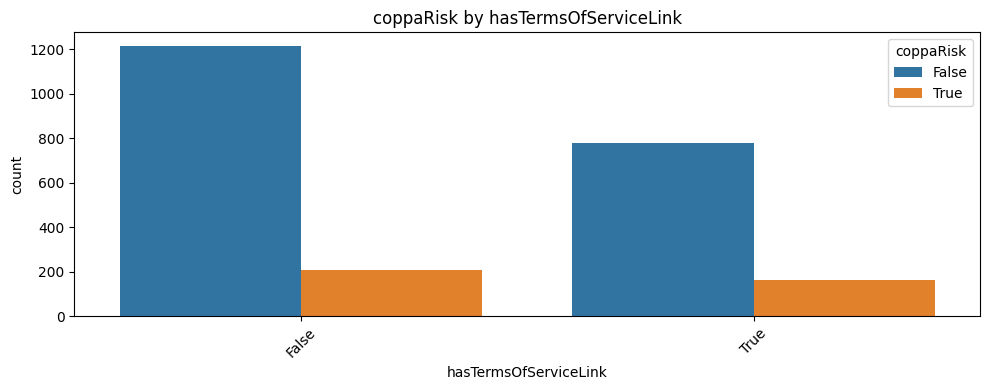

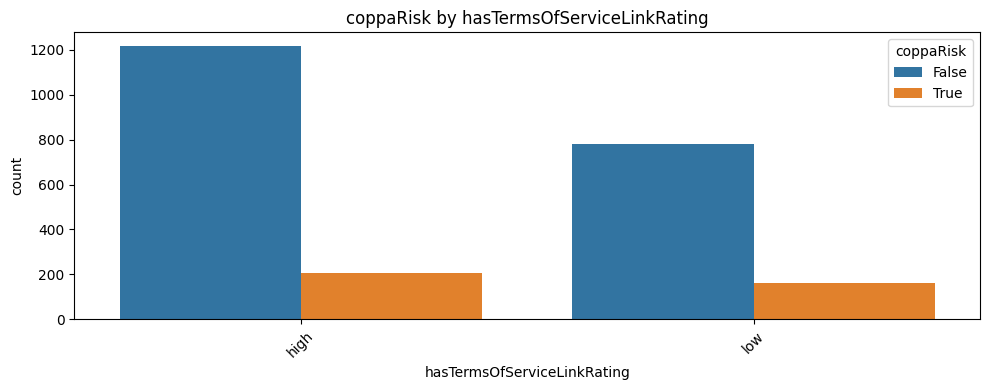

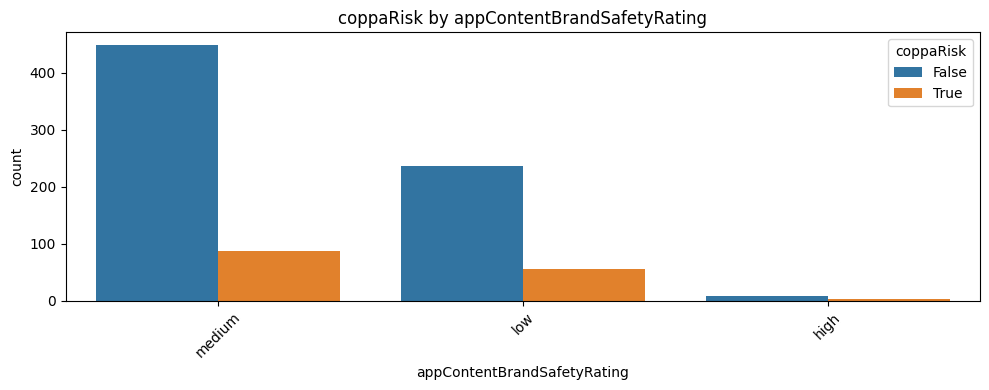

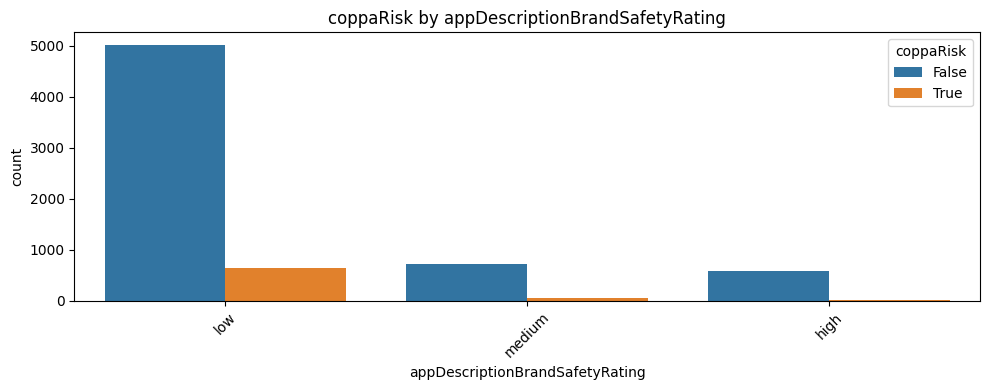

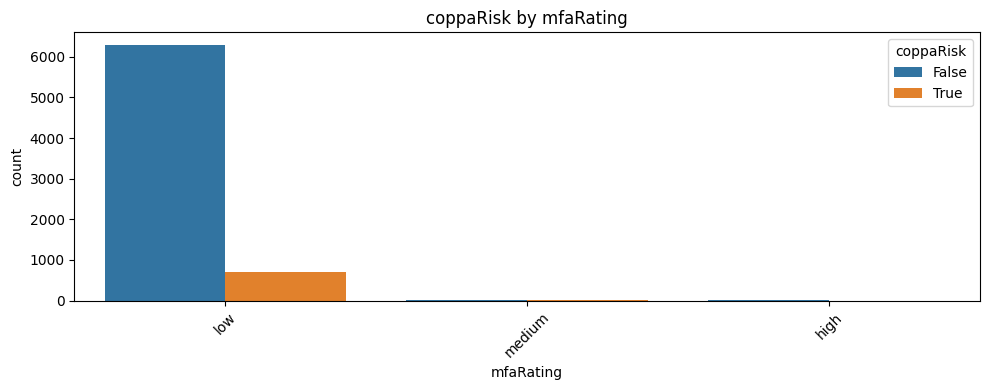

Chi-square p-values (lower is better):


,feature,chi2,p-value
2,primaryGenreName,1231.967794,1.246375e-228
1,countryCode,409.939631,6.806156e-34
3,deviceType,157.332194,5.457851e-33
0,developerCountry,298.584198,1.108485e-18
8,appDescriptionBrandSafetyRating,65.817839,5.103143e-15
5,hasTermsOfServiceLink,2.727985,9.860364e-02
6,hasTermsOfServiceLinkRating,2.727985,9.860364e-02
4,hasPrivacyLink,1.381933,2.397722e-01
7,appContentBrandSafetyRating,1.198507,5.492215e-01
9,mfaRating,0.897729,6.383527e-01


Cramér’s V (higher = stronger association):


,feature,cramers_v
2,primaryGenreName,0.419518
1,countryCode,0.243111
0,developerCountry,0.206531
3,deviceType,0.149920
8,appDescriptionBrandSafetyRating,0.096967
7,appContentBrandSafetyRating,0.037818
6,hasTermsOfServiceLinkRating,0.033963
5,hasTermsOfServiceLink,0.033963
4,hasPrivacyLink,0.014870
9,mfaRating,0.011325


In [ ]:
from scipy.stats import chi2_contingency

categorical_cols = [
    'developerCountry', 'countryCode', 'primaryGenreName', 'deviceType',
    'hasPrivacyLink', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
    'appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'mfaRating'
]

def chi_square_test(df, feature, target="coppaRisk"):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return {"feature": feature, "chi2": chi2, "p-value": p}

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def cramers_v_for_feature(df, feature, target="coppaRisk"):
    confusion_matrix = pd.crosstab(df[feature], df[target])
    return {"feature": feature, "cramers_v": cramers_v(confusion_matrix)}

# Display unique values per category
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(train_df[col].value_counts(dropna=False))

# Barplots: coppaRisk distribution per category
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_df, x=col, hue="coppaRisk", order=train_df[col].value_counts().index)
    plt.title(f"coppaRisk by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chi-square summary
chi2_results = [chi_square_test(train_df, col) for col in categorical_cols]
chi2_df = pd.DataFrame(chi2_results).sort_values("p-value")

# Cramér’s V summary
cramer_results = [cramers_v_for_feature(train_df, col) for col in categorical_cols]
cramer_df = pd.DataFrame(cramer_results).sort_values("cramers_v", ascending=False)

# Display
print("Chi-square p-values (lower is better):")
display(chi2_df)

print("Cramér’s V (higher = stronger association):")
display(cramer_df)

In [ ]:
# Redefinisi ulang fungsi dan hasil analisis karena variabel sebelumnya belum tersedia di kernel

from scipy.stats import chi2_contingency

# Daftar fitur kategorikal
categorical_cols = [
    'developerCountry', 'countryCode', 'primaryGenreName', 'deviceType',
    'hasPrivacyLink', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
    'appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'mfaRating'
]

# Fungsi chi-square
def chi_square_test(df, feature, target="coppaRisk"):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return {"feature": feature, "chi2": chi2, "p-value": p}

# Fungsi Cramér’s V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def cramers_v_for_feature(df, feature, target="coppaRisk"):
    confusion_matrix = pd.crosstab(df[feature], df[target])
    return {"feature": feature, "cramers_v": cramers_v(confusion_matrix)}

# Jalankan analisis untuk semua fitur kategorikal
chi2_df = pd.DataFrame([chi_square_test(train_df, col) for col in categorical_cols])
cramer_df = pd.DataFrame([cramers_v_for_feature(train_df, col) for col in categorical_cols])

# Gabungkan dan beri flag signifikan
merged_stats_df = chi2_df.merge(cramer_df, on="feature").sort_values("cramers_v", ascending=False)
merged_stats_df["significant"] = merged_stats_df["p-value"] < 0.05

merged_stats_df

,feature,chi2,p-value,cramers_v,significant
2,primaryGenreName,1231.967794,1.246375e-228,0.419518,True
1,countryCode,409.939631,6.806156e-34,0.243111,True
0,developerCountry,298.584198,1.108485e-18,0.206531,True
3,deviceType,157.332194,5.457851e-33,0.149920,True
8,appDescriptionBrandSafetyRating,65.817839,5.103143e-15,0.096967,True
7,appContentBrandSafetyRating,1.198507,5.492215e-01,0.037818,False
6,hasTermsOfServiceLinkRating,2.727985,9.860364e-02,0.033963,False
5,hasTermsOfServiceLink,2.727985,9.860364e-02,0.033963,False
4,hasPrivacyLink,1.381933,2.397722e-01,0.014870,False
9,mfaRating,0.897729,6.383527e-01,0.011325,False



---

🔥 Top 5 Fitur Kategorikal Paling Berpengaruh terhadap coppaRisk:
(Berdasarkan Cramér's V & p-value)

| Rank | Fitur                           | Cramér's V | Signifikan | Insight Visualisasi |
|------|----------------------------------|------------|------------|----------------------|
| 1️⃣  | `primaryGenreName`              | **0.42**   | ✅          | Genre *Games*, *Education* dan *Entertainment* dominan pada label True |
| 2️⃣  | `countryCode`                   | 0.24       | ✅          | Dominasi kategori `GLOBAL`, beberapa kode spesifik punya outlier True |
| 3️⃣  | `developerCountry`              | 0.21       | ✅          | Banyak kategori sangat jarang muncul, perlu encoding khusus |
| 4️⃣  | `deviceType`                    | 0.15       | ✅          | Aplikasi GLOBAL & smartphone paling banyak terkait risiko |
| 5️⃣  | `appDescriptionBrandSafetyRating` | 0.10     | ✅          | Risiko COPPA lebih tinggi pada deskripsi rating `low`

---

⚠️ Fitur Lain dengan Pengaruh Lemah/Tidak Signifikan:
- `hasPrivacyLink`, `hasTermsOfServiceLink`, `mfaRating`, dsb. tidak menunjukkan asosiasi kuat dengan coppaRisk.
- Tetap bisa diuji dalam model, tapi **tidak prioritas dalam feature importance**.

---

 🧠 **Saran Strategi Encoding Selanjutnya:**

| Masalah                        | Solusi Disarankan                                                                 |
|-------------------------------|------------------------------------------------------------------------------------|
| Terlalu banyak kategori rare  | Gabungkan menjadi `'Other'` (misalnya `developerCountry`, `countryCode`)         |
| Fitur ordinal seperti rating  | Bisa di-encode dengan label encoding atau ordinal scale (`low` < `medium` < `high`) |
| Kategori terbatas             | Pakai One-Hot Encoding (misalnya `deviceType`, `primaryGenreName` top N)         |

---

## EDA Spesial Fitur (Range->Numerik)

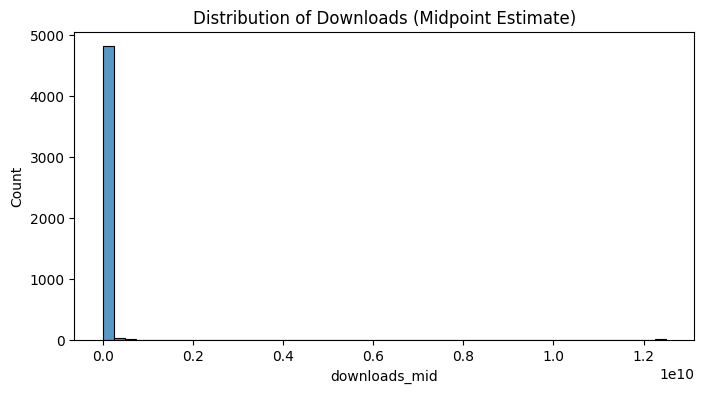

Correlation with coppaRisk: 0.01544136331517845


In [ ]:
# Helper to extract min, max, and midpoint
def process_downloads(value):
    if pd.isnull(value):
        return np.nan
    try:
        parts = value.split(' - ')
        min_val = int(parts[0].replace(",", ""))
        max_val = int(parts[1].replace(",", ""))
        return (min_val + max_val) / 2
    except:
        return np.nan

# Apply processing
train_df["downloads_mid"] = train_df["downloads"].apply(process_downloads)
test_df["downloads_mid"] = test_df["downloads"].apply(process_downloads)

# Show distribution and correlation
plt.figure(figsize=(8, 4))
sns.histplot(train_df["downloads_mid"], bins=50)
plt.title("Distribution of Downloads (Midpoint Estimate)")
plt.show()

# Check correlation with target
print("Correlation with coppaRisk:", train_df[["downloads_mid", "coppaRisk"]].corr().iloc[0, 1])

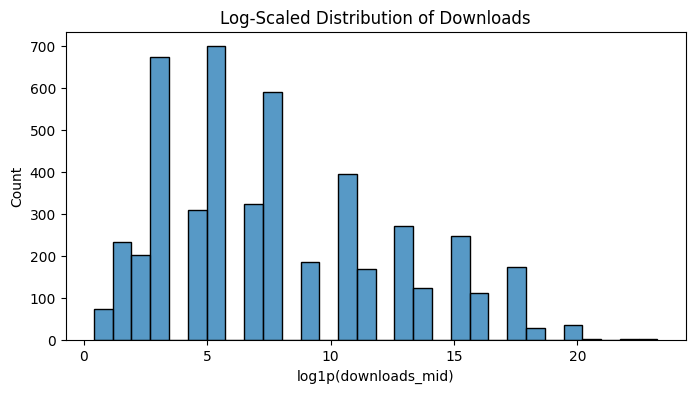

Correlation with coppaRisk (log-scaled): 0.1933169717146962


In [ ]:
# Add a log-scaled version of downloads_mid
train_df["downloads_log"] = np.log1p(train_df["downloads_mid"])
test_df["downloads_log"] = np.log1p(test_df["downloads_mid"])

# Plot it again
plt.figure(figsize=(8, 4))
sns.histplot(train_df["downloads_log"], bins=30)
plt.title("Log-Scaled Distribution of Downloads")
plt.xlabel("log1p(downloads_mid)")
plt.show()

# Correlation with coppaRisk again (raw or log version)
corr_downloads = train_df[["downloads_log", "coppaRisk"]].corr().iloc[0, 1]
print("Correlation with coppaRisk (log-scaled):", corr_downloads)

# 2. Pre-Processing

## Transform Skew Fitur

In [ ]:
import numpy as np

# Copy to avoid altering original
df_train = train_df.copy()
df_test = test_df.copy()

df_train["downloads"] = df_train["downloads"].apply(process_downloads)
df_test["downloads"] = df_test["downloads"].apply(process_downloads)

In [ ]:
# Log-transform skewed features
df_train["userRatingCount_log"] = np.log1p(df_train["userRatingCount"])
df_test["userRatingCount_log"] = np.log1p(df_test["userRatingCount"])

df_train["adSpent_log"] = np.log1p(df_train["adSpent"])
df_test["adSpent_log"] = np.log1p(df_test["adSpent"])

df_train["downloads_log"] = np.log1p(df_train["downloads_mid"])
df_test["downloads_log"] = np.log1p(df_test["downloads_mid"])

# Optional: drop original columns if you're only using log versions
# df_train.drop(["userRatingCount", "adSpent"], axis=1, inplace=True)
# df_test.drop(["userRatingCount", "adSpent"], axis=1, inplace=True)

print("✅ Skewed features transformed!")

✅ Skewed features transformed!


## Handle Missing Value

In [ ]:
# Hitung jumlah missing
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

# Hitung proporsi missing dalam persen
missing_train_percent = 100 * missing_train / len(df_train)
missing_test_percent = 100 * missing_test / len(df_test)

# Filter yang lebih dari 0%
missing_train_filtered = missing_train_percent[missing_train_percent > 0].sort_values(ascending=False)
missing_test_filtered = missing_test_percent[missing_test_percent > 0].sort_values(ascending=False)

# Gabungkan jadi satu tabel untuk perbandingan
missing_summary = pd.concat([missing_train_filtered, missing_test_filtered], axis=1, keys=['% Missing Train', '% Missing Test'])
missing_summary

,% Missing Train,% Missing Test
appContentBrandSafetyRating,88.028571,89.033333
adSpent,81.128571,80.866667
adSpent_log,81.128571,80.866667
hasTermsOfServiceLink,66.214286,65.366667
hasTermsOfServiceLinkRating,66.214286,65.366667
downloads_log,30.700000,29.366667
downloads_mid,30.700000,29.366667
downloads,30.700000,29.366667
averageUserRating,17.600000,17.133333
isCorporateEmailScore,16.114286,14.666667


In [ ]:
# Fill missing values in numerical features with median
num_cols_to_fill = ['userRatingCount', 'adSpent']
for col in num_cols_to_fill:
    median_val = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_val)
    df_test[col] = df_test[col].fillna(median_val)

# Fill missing values in categorical columns with "Missing"
cat_cols = [
    'developerCountry', 'countryCode', 'primaryGenreName', 'deviceType',
    'hasPrivacyLink', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
    'appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'mfaRating'
]
for col in cat_cols:
    df_train[col] = df_train[col].fillna("Missing")
    df_test[col] = df_test[col].fillna("Missing")

print("✅ Missing values handled!")

✅ Missing values handled!


In [ ]:
# Hitung jumlah missing
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

# Hitung proporsi missing dalam persen
missing_train_percent = 100 * missing_train / len(df_train)
missing_test_percent = 100 * missing_test / len(df_test)

# Filter yang lebih dari 0%
missing_train_filtered = missing_train_percent[missing_train_percent > 0].sort_values(ascending=False)
missing_test_filtered = missing_test_percent[missing_test_percent > 0].sort_values(ascending=False)

# Gabungkan jadi satu tabel untuk perbandingan
missing_summary = pd.concat([missing_train_filtered, missing_test_filtered], axis=1, keys=['% Missing Train', '% Missing Test'])
missing_summary

,% Missing Train,% Missing Test
adSpent_log,81.128571,80.866667
downloads_mid,30.700000,29.366667
downloads,30.700000,29.366667
downloads_log,30.700000,29.366667
averageUserRating,17.600000,17.133333
isCorporateEmailScore,16.114286,14.666667
appAge,0.714286,0.566667


In [ ]:
# ---- Handle isCorporateEmailScore ----
email_score_median = df_train["isCorporateEmailScore"].median()

df_train["isCorporateEmailScore"] = df_train["isCorporateEmailScore"].fillna(email_score_median)
df_test["isCorporateEmailScore"] = df_test["isCorporateEmailScore"].fillna(email_score_median)

# ---- Handle appAge ----
app_age_median = df_train["appAge"].median()

df_train["appAge"] = df_train["appAge"].fillna(app_age_median)
df_test["appAge"] = df_test["appAge"].fillna(app_age_median)

# ---- Handle averageUserRating ----
user_rating_median = df_train["averageUserRating"].median()

df_train["averageUserRating"] = df_train["averageUserRating"].fillna(user_rating_median)
df_test["averageUserRating"] = df_test["averageUserRating"].fillna(user_rating_median)

# ---- Handle downloads_mid and downloads_log ----

# ---- Add missing flag columns ----
df_train["downloads_missing"] = df_train["downloads_mid"].isna().astype(int)
df_test["downloads_missing"] = df_test["downloads_mid"].isna().astype(int)

# Fill missing with -1 to preserve as "unknown"
df_train["downloads_mid"] = df_train["downloads_mid"].fillna(-1)
df_test["downloads_mid"] = df_test["downloads_mid"].fillna(-1)

df_train["downloads_log"] = df_train["downloads_log"].fillna(-1)
df_test["downloads_log"] = df_test["downloads_log"].fillna(-1)

df_train["downloads"] = df_train["downloads"].fillna(-1)
df_test["downloads"] = df_test["downloads"].fillna(-1)

# ---- Handle adSpent_log ----

# Fill with -1 to signal "no ad spend info"
df_train["adSpent_log"] = df_train["adSpent_log"].fillna(-1)
df_test["adSpent_log"] = df_test["adSpent_log"].fillna(-1)

In [ ]:
df_train

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,userRatingCount_log,adSpent_log,downloads_mid,downloads_log,downloads_missing
0,NORWAY,RO,127731,Sports,-1.0,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False,11.757690,2.709198,-1.0,-1.000000,1
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,75.0,GLOBAL,True,Missing,Missing,99.0,7.945580,17.500000,0.0,Missing,low,low,False,0.000000,-1.000000,75.0,4.330733,0
2,UNITED ARAB EMIRATES,CZ,51143,Games,75000000.0,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,Missing,low,low,False,10.842400,3.492961,75000000.0,18.132999,0
3,GERMANY,GLOBAL,1074,Games,-1.0,GLOBAL,True,Missing,Missing,99.0,7.945580,71.533333,4.0,Missing,low,low,False,6.980076,-1.000000,-1.0,-1.000000,1
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,3000.0,GLOBAL,True,Missing,Missing,99.0,7.945580,52.400000,4.0,Missing,low,low,False,2.890372,-1.000000,3000.0,8.006701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,-1.0,GLOBAL,True,Missing,Missing,99.0,7.945580,26.266667,0.0,Missing,low,low,False,0.000000,-1.000000,-1.0,-1.000000,1
6996,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,-1.0,GLOBAL,True,Missing,Missing,0.0,7.945580,23.800000,0.0,Missing,low,low,False,0.000000,-1.000000,-1.0,-1.000000,1
6997,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,30.0,GLOBAL,True,Missing,Missing,0.0,7.945580,27.500000,3.0,Missing,medium,low,False,0.000000,-1.000000,30.0,3.433987,0
6998,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,30.0,GLOBAL,True,False,high,99.0,7.945580,124.033333,0.0,Missing,low,low,False,0.000000,-1.000000,30.0,3.433987,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      7000 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        7000 non-null   float64
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   7000 non-null   object 
 7   hasTermsOfServiceLink            7000 non-null   object 
 8   hasTermsOfServiceLinkRating      7000 non-null   object 
 9   isCorporateEmailScore            7000 non-null   float64
 10  adSpent                          7000 non-null   float64
 11  appAge                           7000 non-null   float64
 12  averageUserRating   

## Encoding Variabel Kategorik

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Reuse the same categorical columns from before
categorical_cols = [
    'developerCountry', 'countryCode', 'primaryGenreName', 'deviceType',
    'hasPrivacyLink', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
    'appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'mfaRating'
]

# Encode each column using the same LabelEncoder on train & test
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on combined data to avoid unknown categories
    combined_values = pd.concat([df_train[col], df_test[col]], axis=0).astype(str)
    le.fit(combined_values)

    df_train[col] = le.transform(df_train[col].astype(str))
    df_test[col] = le.transform(df_test[col].astype(str))

print("✅ Categorical variables encoded for train and test.")

✅ Categorical variables encoded for train and test.


In [ ]:
print(df_train[categorical_cols].dtypes)
df_train[categorical_cols].head()

developerCountry                   int64
countryCode                        int64
primaryGenreName                   int64
deviceType                         int64
hasPrivacyLink                     int64
hasTermsOfServiceLink              int64
hasTermsOfServiceLinkRating        int64
appContentBrandSafetyRating        int64
appDescriptionBrandSafetyRating    int64
mfaRating                          int64
dtype: object


,developerCountry,countryCode,primaryGenreName,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,82,99,38,2,2,2,2,3,1,1
1,0,42,23,0,2,1,0,0,1,1
2,118,26,15,0,2,2,2,0,1,1
3,41,42,15,0,2,1,0,0,1,1
4,22,42,40,0,2,1,0,0,1,1


## Drop Kolom Tidak Relevan

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   int64  
 1   countryCode                      7000 non-null   int64  
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   int64  
 4   downloads                        7000 non-null   float64
 5   deviceType                       7000 non-null   int64  
 6   hasPrivacyLink                   7000 non-null   int64  
 7   hasTermsOfServiceLink            7000 non-null   int64  
 8   hasTermsOfServiceLinkRating      7000 non-null   int64  
 9   isCorporateEmailScore            7000 non-null   float64
 10  adSpent                          7000 non-null   float64
 11  appAge                           7000 non-null   float64
 12  averageUserRating   

In [ ]:
# Drop weak / redundant features
cols_to_drop = [
    "appContentBrandSafetyRating",
    "adSpent",
    "hasTermsOfServiceLink",
    "hasTermsOfServiceLinkRating",
    "downloads_mid",   # we keep downloads_log
    "userRatingCount",  # we keep userRatingCount_log
    "downloads"
]

df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

print("✅ Selected weak/redundant columns dropped.")

✅ Selected weak/redundant columns dropped.


In [ ]:
df_train

,developerCountry,countryCode,primaryGenreName,deviceType,hasPrivacyLink,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,userRatingCount_log,adSpent_log,downloads_log,downloads_missing
0,82,99,38,2,2,99.0,160.400000,4.0,1,1,False,11.757690,2.709198,-1.000000,1
1,0,42,23,0,2,99.0,17.500000,0.0,1,1,False,0.000000,-1.000000,4.330733,0
2,118,26,15,0,2,0.0,30.766667,4.0,1,1,False,10.842400,3.492961,18.132999,0
3,41,42,15,0,2,99.0,71.533333,4.0,1,1,False,6.980076,-1.000000,-1.000000,1
4,22,42,40,0,2,99.0,52.400000,4.0,1,1,False,2.890372,-1.000000,8.006701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,42,43,0,2,99.0,26.266667,0.0,1,1,False,0.000000,-1.000000,-1.000000,1
6996,0,42,5,0,2,0.0,23.800000,0.0,1,1,False,0.000000,-1.000000,-1.000000,1
6997,0,42,30,0,2,0.0,27.500000,3.0,2,1,False,0.000000,-1.000000,3.433987,0
6998,0,42,5,0,2,99.0,124.033333,0.0,1,1,False,0.000000,-1.000000,3.433987,0


# Modelling

## XGBOOST (0.83736)

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Split data again
X = df_train.drop(columns=["coppaRisk"])
y = df_train["coppaRisk"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Build DMatrix (XGBoost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set params
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": (y == 0).sum() / (y == 1).sum(),  # helps with imbalance
    "eta": 0.001,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

# Train
bst = xgb.train(params, dtrain, num_boost_round=300, evals=[(dval, "val")], early_stopping_rounds=30, verbose_eval=50)

# Predict
y_pred_proba = bst.predict(dval)
auc = roc_auc_score(y_val, y_pred_proba)
print(f"🚀 XGBoost AUC Score: {auc:.5f}")

[0]	val-auc:0.86243
[50]	val-auc:0.89328
[100]	val-auc:0.89625
[113]	val-auc:0.89668
🚀 XGBoost AUC Score: 0.89685


In [ ]:
# Buat DMatrix dari df_test yang sudah tidak punya kolom ID
dtest = xgb.DMatrix(df_test)

# Prediksi probabilitas
test_pred_proba = bst.predict(dtest)

# Apply threshold
test_pred_label = test_pred_proba > 0.5

# Buat file submission
submission = pd.DataFrame({
    "ID": test_ids,  # gunakan ID yang sudah disimpan
    "coppaRisk": test_pred_label
})

# Convert boolean ke string agar sesuai format
submission["coppaRisk"] = submission["coppaRisk"].map({True: "True", False: "False"})

# Simpan ke CSV
submission.to_csv("submission_xgboost.csv", index=False)

print("✅ XGBoost submission saved as: submission_xgboost.csv")

✅ XGBoost submission saved as: submission_xgboost.csv


<Figure size 1200x600 with 0 Axes>

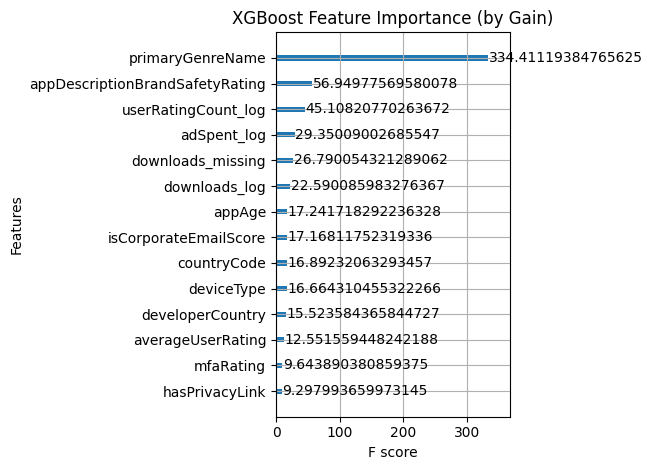

In [ ]:
# Plot top 20 most important features by "gain" (how much they improve splits)
plt.figure(figsize=(12, 6))
xgb.plot_importance(bst, importance_type='gain', max_num_features=20)
plt.title("XGBoost Feature Importance (by Gain)")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Simpan model
joblib.dump(bst, 'xgboost_copparisk_model.pkl')

print("✅ Model XGBoost disimpan sebagai 'xgboost_copparisk_model.pkl'")

✅ Model XGBoost disimpan sebagai 'xgboost_copparisk_model.pkl'
